In [1]:
from qiskit import IBMQ
IBMQ.load_accounts()

C:\Users\Vinu\Anaconda3\envs\QISKitenv\lib\site-packages\marshmallow\schema.py:364: ChangedInMarshmallow3Warning: strict=False is not recommended. In marshmallow 3.0, schemas will always be strict. See https://marshmallow.readthedocs.io/en/latest/upgrading.html#schemas-are-always-strict
  ChangedInMarshmallow3Warning


# Basic Imports needed to create and Visualize the circuit

In [4]:
# useful additional packages 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
# importing Qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, IBMQ, execute

# import basic plot tools
from qiskit.tools.visualization import matplotlib_circuit_drawer as circuit_drawer
from qiskit.tools.visualization import plot_histogram, qx_color_scheme

C:\Users\Vinu\Anaconda3\envs\QISKitenv\lib\site-packages\marshmallow\schema.py:364: ChangedInMarshmallow3Warning: strict=False is not recommended. In marshmallow 3.0, schemas will always be strict. See https://marshmallow.readthedocs.io/en/latest/upgrading.html#schemas-are-always-strict
  ChangedInMarshmallow3Warning


# Ciruit Construction

In [5]:
# Creating registers
tq = QuantumRegister(3)
tc0 = ClassicalRegister(1)
tc1 = ClassicalRegister(1)
tc2 = ClassicalRegister(1)

# Quantum circuit to make the shared entangled state 
tel = QuantumCircuit(tq, tc0,tc1,tc2)
tel.h(tq[1]) #HADAMARD
tel.cx(tq[1], tq[2]) #CNOT

tel.ry(0.5,tq[0]) #Ry ROTATION OF BLOC SPHERE 
tel.cx(tq[0],tq[1])
tel.h(tq[0])
tel.barrier()

# Measurement of Quantum States being undertaken 

In [6]:
tel.measure(tq[0],tc0[0])
tel.measure(tq[1],tc1[0])

# Applying conditional transforms

In [8]:
tel.z(tq[2]).c_if(tc0,1)
tel.x(tq[2]).c_if(tc1,1)
tel.measure(tq[2],tc2[0])

C:\Users\Vinu\Anaconda3\envs\QISKitenv\lib\site-packages\qiskit\tools\visualization\_circuit_visualization.py:544: DeprecationWarning: The matplotlib_circuit_drawer() function is deprecated and will be removed in a future release. Instead use the circuit_drawer() function with the `output` kwarg set to `mpl`.
  '`mpl`.', DeprecationWarning)


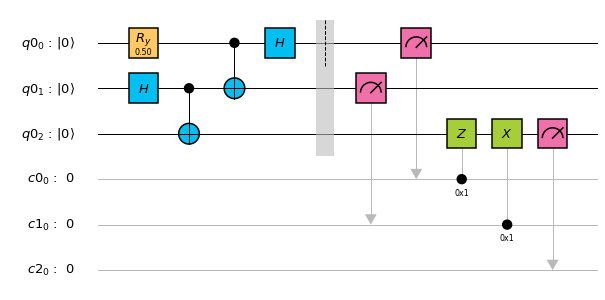

In [9]:
circuit_drawer(tel,style=qx_color_scheme())

In [11]:
local_backend = Aer.get_backend('qasm_simulator') 
tel_job = execute(tel, local_backend) 
tel_result = tel_job.result()

## Creates Historgram after normalizing the data

<b><u>Data is a dictory of probabilities </u></b><br/>
Therefore <br/>
<b>alice['00'] = data['0 0 0'] + data['1 0 0']<br/>
alice['00'] = alice["00"]/sum(alice.values())</b>
<br/>

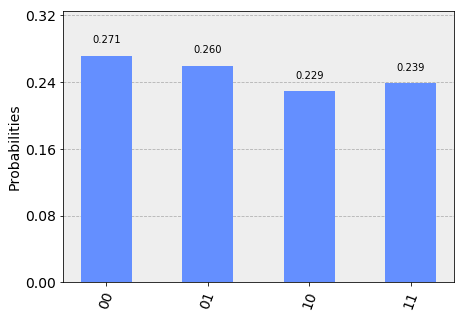

In [12]:
data = tel_result.get_counts(tel)
alice = {}
alice['00'] = data['0 0 0'] + data['1 0 0']
alice['10'] = data['0 1 0'] + data['1 1 0']
alice['01'] = data['0 0 1'] + data['1 0 1']
alice['11'] = data['0 1 1'] + data['1 1 1']
plot_histogram(alice)

In [13]:
print(data)

{'1 0 1': 14, '0 1 0': 223, '0 1 1': 236, '1 1 1': 9, '1 0 0': 20, '0 0 0': 258, '0 0 1': 252, '1 1 0': 12}


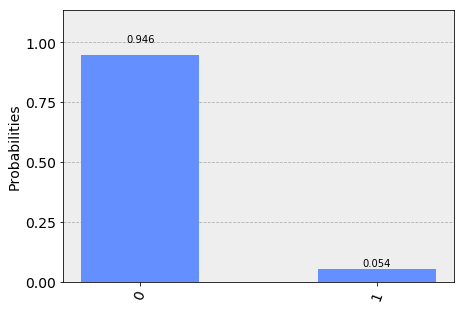

In [14]:
bob = {}
bob['0'] = data['0 0 0'] + data['0 1 0'] +  data['0 0 1'] + data['0 1 1']
bob['1'] = data['1 0 0'] + data['1 1 0'] +  data['1 0 1'] + data['1 1 1']
plot_histogram(bob)

## 